<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/SHAP_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap
import pandas as pd
import shap
import sklearn
from sklearn.preprocessing import LabelEncoder
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)
encoder=LabelEncoder()
dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])
shap.initjs()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

dataset.head()


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)



from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.5 MB/s 


In [2]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=2)
KNN_class.fit(X_train, y_train)
y_pred_KNN=KNN_class.predict(X_test)

In [3]:
# Fits the explainer
explainer = shap.Explainer(KNN_class.predict, X_test[0:100])
# Calculates the SHAP values - It takes some time
shap_values = explainer( X_test[0:100])

Permutation explainer: 101it [1:24:19, 50.59s/it]


In [5]:
features_names=list(dataset.iloc[0:0, 0:75])
print(features_names)

['Sleep Stage', 'MeanP_Alpha_F4', 'MedianF_Alpha_F4', 'MeanF_Alpha_F4', 'Spectral Edge_Alpha_F4', 'PeakF_Alpha_F4', 'MeanP_Beta_F4', 'MedianF_Beta_F4', 'MeanF_Beta_F4', 'Spectral Edge_Beta_F4', 'PeakF_Beta_F4', 'MeanP_Theta_F4', 'MedianF_Theta_F4', 'MeanF_Theta_F4', 'Spectral Edge_Theta_F4', 'PeakF_Theta_F4', 'MeanP_Delta_F4', 'MedianF_Delta_F4', 'MeanF_Delta_F4', 'Spectral Edge_Delta_F4', 'PeakF_Delta_F4', 'MeanP_Gamma_F4', 'MedianF_Gamma_F4', 'MeanF_Gamma_F4', 'Spectral Edge_Gamma_F4', 'PeakF_Gamma_F4', 'MeanP_Alpha_C4', 'MedianF_Alpha_C4', 'MeanF_Alpha_C4', 'Spectral Edge_Alpha_C4', 'PeakF_Alpha_C4', 'MeanP_Beta_C4', 'MedianF_Beta_C4', 'MeanF_Beta_C4', 'Spectral Edge_Beta_C4', 'PeakF_Beta_C4', 'MeanP_Theta_C4', 'MedianF_Theta_C4', 'MeanF_Theta_C4', 'Spectral Edge_Theta_C4', 'PeakF_Theta_C4', 'MeanP_Delta_C4', 'MedianF_Delta_C4', 'MeanF_Delta_C4', 'Spectral Edge_Delta_C4', 'PeakF_Delta_C4', 'MeanP_Gamma_C4', 'MedianF_Gamma_C4', 'MeanF_Gamma_C4', 'Spectral Edge_Gamma_C4', 'PeakF_Gamma

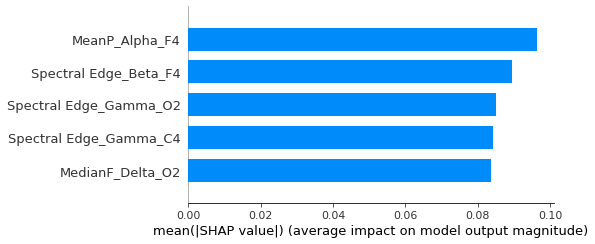

In [6]:
shap.summary_plot(shap_values, X, plot_type="bar",max_display=5,feature_names=features_names)

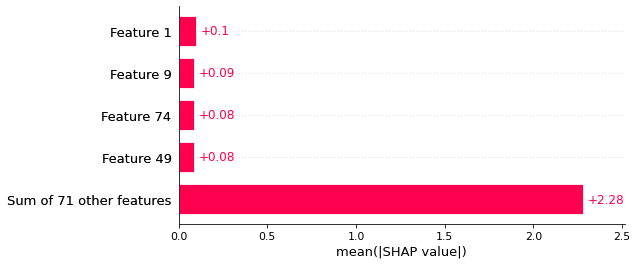

In [8]:
shap.plots.bar(shap_values,max_display=5)

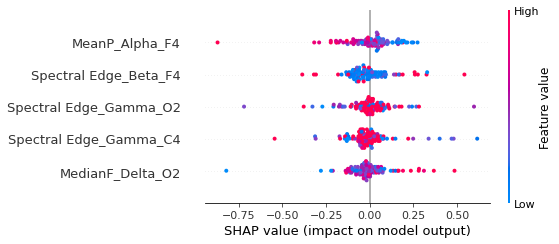

In [9]:
shap.summary_plot(shap_values,max_display=5,feature_names=features_names)

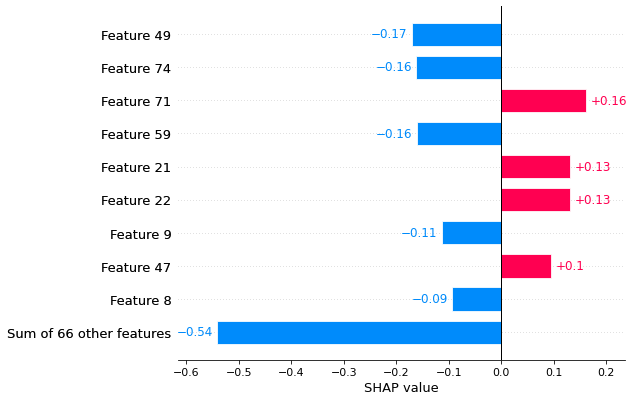

In [10]:
shap.plots.bar(shap_values[1])

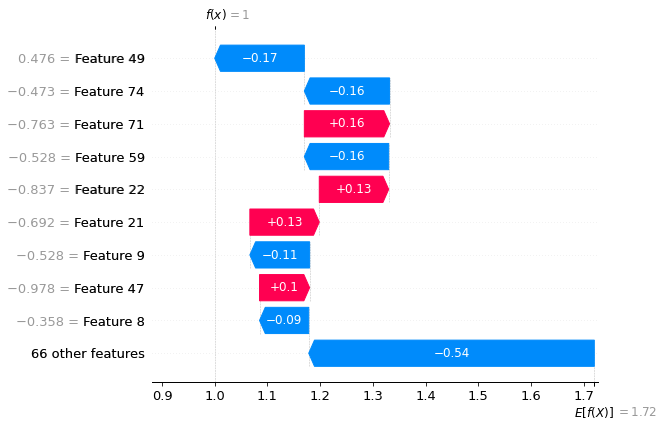

In [11]:
shap.plots.waterfall(shap_values[1])

In [13]:
shap.initjs()
shap.plots.force(shap_values[0],feature_names=features_names)



---



In [14]:
#explainer = shap.SamplingExplainer(KNN_class,X_test)
explainer = shap.KernelExplainer(KNN_class.predict_proba, X_train[0:100])
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

  0%|          | 0/1 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [16]:
shap.initjs()
# Force plot
prediction = KNN_class.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names=features_names)

The RF predicted: 1


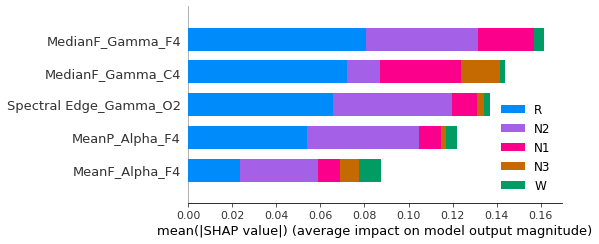

In [17]:
shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar",class_names=["N1","N2","N3","R","W"],max_display=5,feature_names=features_names)